In [1]:
import pandas as pd
import numpy as np
from pyjet import cluster,DTYPE_PTEPM
import math
import h5py
import matplotlib.pyplot as plt

In [2]:
# m_12 = sqrt ( (E_1 + E_2)^2 - (p_x1 + p_x2)^2 - (p_y1 + p_y2)^2 - (p_z1 + p_z2)^2 )
def invariant_mass(jet1, jet2):
    return math.sqrt((jet1.e + jet2.e)**2 - (jet1.px + jet2.px)**2 - (jet1.py + jet2.py)**2 - (jet1.pz + jet2.pz)**2)

In [3]:
path = '/anomalyvol/data/jet_ver/bb1_jet_mass.h5'

In [4]:
chunk_size = 100000
total_size = 1000000 # 1 mil max

def generator(path, chunk_size=10000,total_size=1000000):
    i = 0
    
    while True:
        yield pd.read_hdf(path,start=i*chunk_size, stop=(i+1)*chunk_size)
        
        i+=1
        if (i+1)*chunk_size > total_size:
            i=0

gen = generator(path, chunk_size, total_size)

In [5]:
# fully load in pandas dataframe
data = next(gen)

for i in range(total_size // chunk_size - 1):
    data.append(next(gen))

data

,mass
0,3157.841212
1,2488.262160
2,3499.867409
3,2729.477504
4,2513.728451
...,...
99995,2793.668164
99996,2949.037392
99997,2434.859286
99998,4568.112669


In [6]:
loaded_data = data
# data = loaded_data

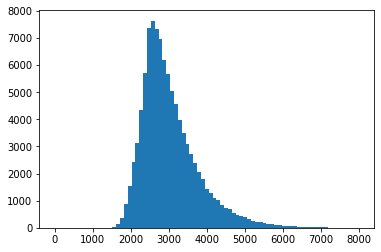

In [10]:
_ = plt.hist(data.mass, bins=np.linspace(0,8000,80))

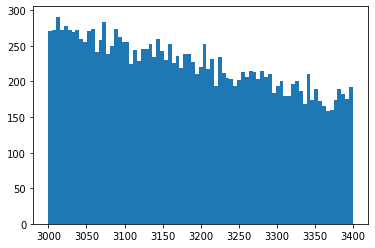

In [17]:
_ = plt.hist(data.loc[(data.mass > 3000) & (data.mass < 3400)].mass, bins=np.linspace(3000,3400,80))